<a href="https://colab.research.google.com/github/bineee39/first-repository/blob/master/wrapup3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
data=pd.read_csv("./marketing_campaign.csv", sep="\t")

In [19]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [20]:
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

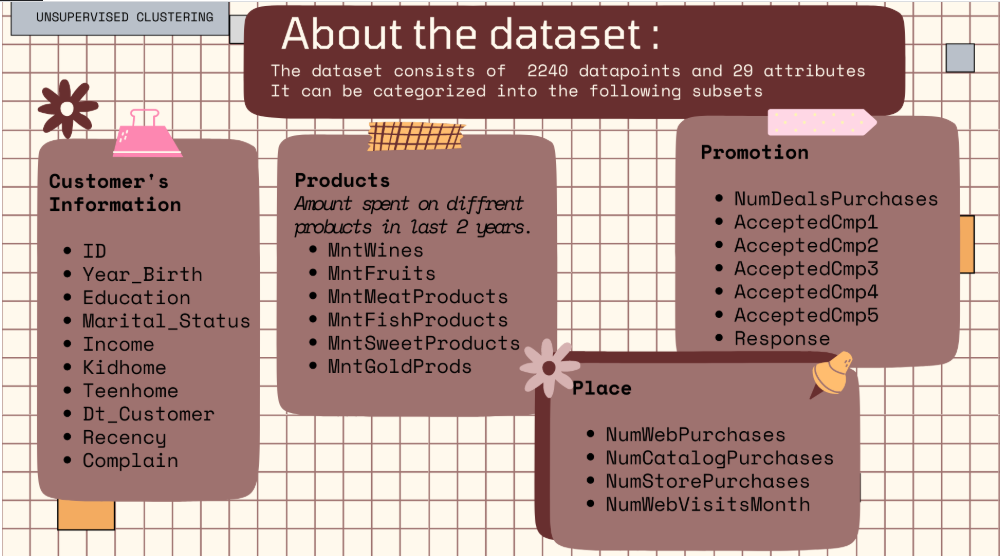

## 목적
### 고객 정보를 바탕으로 유사한 특성을 가진 고객 그룹(세그먼트)을 분류


## 데이터 정보
### 고객 정보
- ID: 고객 식별자

- Year_Birth, Education, Marital_Status: 출생 연도, 학력, 결혼 상태

- Income: 연간 소득

- Kidhome, Teenhome: 가구 내 미성년 자녀 수 (어린이, 청소년)

- Dt_Customer: 고객 등록 날짜

- Recency: 마지막 구매 이후 경과된 일수

- Complain: 지난 2년간 고객 불만 제기 여부 (1 또는 0)

###제품 (Products)
#### 지난 2년간 고객이 다양한 제품군에 지출한 금액 정보
- MntWines: 와인에 지출한 금액

- MntFruits: 과일에 지출한 금액

- MntMeatProducts: 육류 제품에 지출한 금액

- MntFishProducts: 해산물에 지출한 금액

- MntSweetProducts: 단 제품에 지출한 금액

- MntGoldProds: 금 제품에 지출한 금액

### 프로모션 (Promotion)
- NumDealsPurchases: 할인 거래를 통해 구매한 횟수

- AcceptedCmp1-5: 각 캠페인(1~5)의 제안 수락 여부 (1 또는 0)

- Response: 마지막 캠페인 제안 수락 여부 (1 또는 0)

###구매 채널 (Place)
- NumWebPurchases: 웹사이트를 통한 구매 횟수

- NumCatalogPurchases: 카탈로그를 통한 구매 횟수

- NumStorePurchases: 매장을 통한 구매 횟수

- NumWebVisitsMonth: 지난 한 달간 웹사이트 방문 횟수

## 전처리

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

income에 na값 존재

Dt_Customer 를 datetime으로 변환해야함

object인 값을 수치화해야됨

In [22]:
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In [24]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"],format='%d-%m-%Y')
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


pandas가 날짜를 월-일-연도 (%m-%d-%Y) 형식으로 입력하려고 하지만 , 실제 데이터 "21-09-2013"는 일-월-연도 (%d-%m-%Y) 형식이므로 format으로 날짜 형식을 맞게 지정하였다(원본 코드엔 없는 부분)

In [25]:
days = []
d1 = max(dates)
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")
#errors='coerce'는 바꿀수 없는 값은 nan 처리하라는 의미


Customer_For 칼럼 생성 :최근 기록된 날짜를 기준으로 고객이 스토어에서 쇼핑을 시작한 일수

In [26]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


범주형 데이터의 고유값 확인

In [29]:
data["Age"] = 2021-data["Year_Birth"]

data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

data["Children"]=data["Kidhome"]+data["Teenhome"]

data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})


to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

/tmp/ipython-input-2915398054.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]


- age : 2021년 - 출생년도로 나이 칼럼 지정
- spent : 모든 제품군에 지출한 금액의 총합
- Living_With : 결혼 상태(Marital_Status) 특성을 이용해 동거인 유무 파악
- Children : 가구 내 미성년 자녀 수
- Family_Size : 가구 크기(가족이 몇명인지)
- Is_Parent : 자녀 유무로 부모인지 아닌지 체크
- Education : 학력을 학부생, 졸업생, 대학원생으로 나눔
- 제품군 지출 관련 열을 Mnt라는 접두사를 제거
- 마지막으로 모델링에 불필요하거나 피처엔지니어링에 사용해 중복되는 데이터는 제거

In [30]:
pd.set_option('display.max_columns', None)
data.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean     26.356047   166.995939    37.637635    27.028881    43.965253   
std      39.793917   224.283273    54.752082    41.072046    51.815414   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000    16.000000     3.000000     1.000000     9.000000   
50%       8.000000    68.000000    12.000000     8.000000    24.500000   
75%      33.000000   232.250000    50.000000    33.000000    56.000000   
max     199.000000  1725.000000   259.000000   262.000000   321.000000   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count        2216.000000      2216.000000          2216.000000   
mean            2.323556         4.085289             2.671029   
std             1.923716         2.740951             2.926734   
min             0.000000         0.000000             0.000000   
25%             1.000000         2.000000             0.000000   
50%             2.000000         4.000000             2.000000   
75%             3.000000         6.000000             4.000000   
max            15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        2216.000000        2216.000000   2216.000000   2216.000000   
mean            5.800993           5.319043      0.073556      0.074007   
std             3.250785           2.425359      0.261106      0.261842   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           3.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count   2216.000000   2216.000000   2216.000000  2216.000000  2216.000000   
mean       0.073105      0.064079      0.013538     0.009477     0.150271   
std        0.260367      0.244950      0.115588     0.096907     0.357417   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   

       Customer_For          Age        Spent     Children  Family_Size  \
count  2.216000e+03  2216.000000  2216.000000  2216.000000  2216.000000   
mean   3.054423e+16    52.179603   607.075361     0.947202     2.592509   
std    1.749036e+16    11.985554   602.900476     0.749062     0.905722   
min    0.000000e+00    25.000000     5.000000     0.000000     1.000000   
25%    1.555200e+16    44.000000    69.000000     0.000000     2.000000   
50%    3.071520e+16    51.000000   396.500000     1.000000     3.000000   
75%    4.570560e+16    62.000000  1048.000000     1.000000     3.000000   
max    6.039360e+16   128.000000  2525.000000     3.000000     5.000000   

         Is_Parent  


연령 최대가 128이므로 이상치가 존재함

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

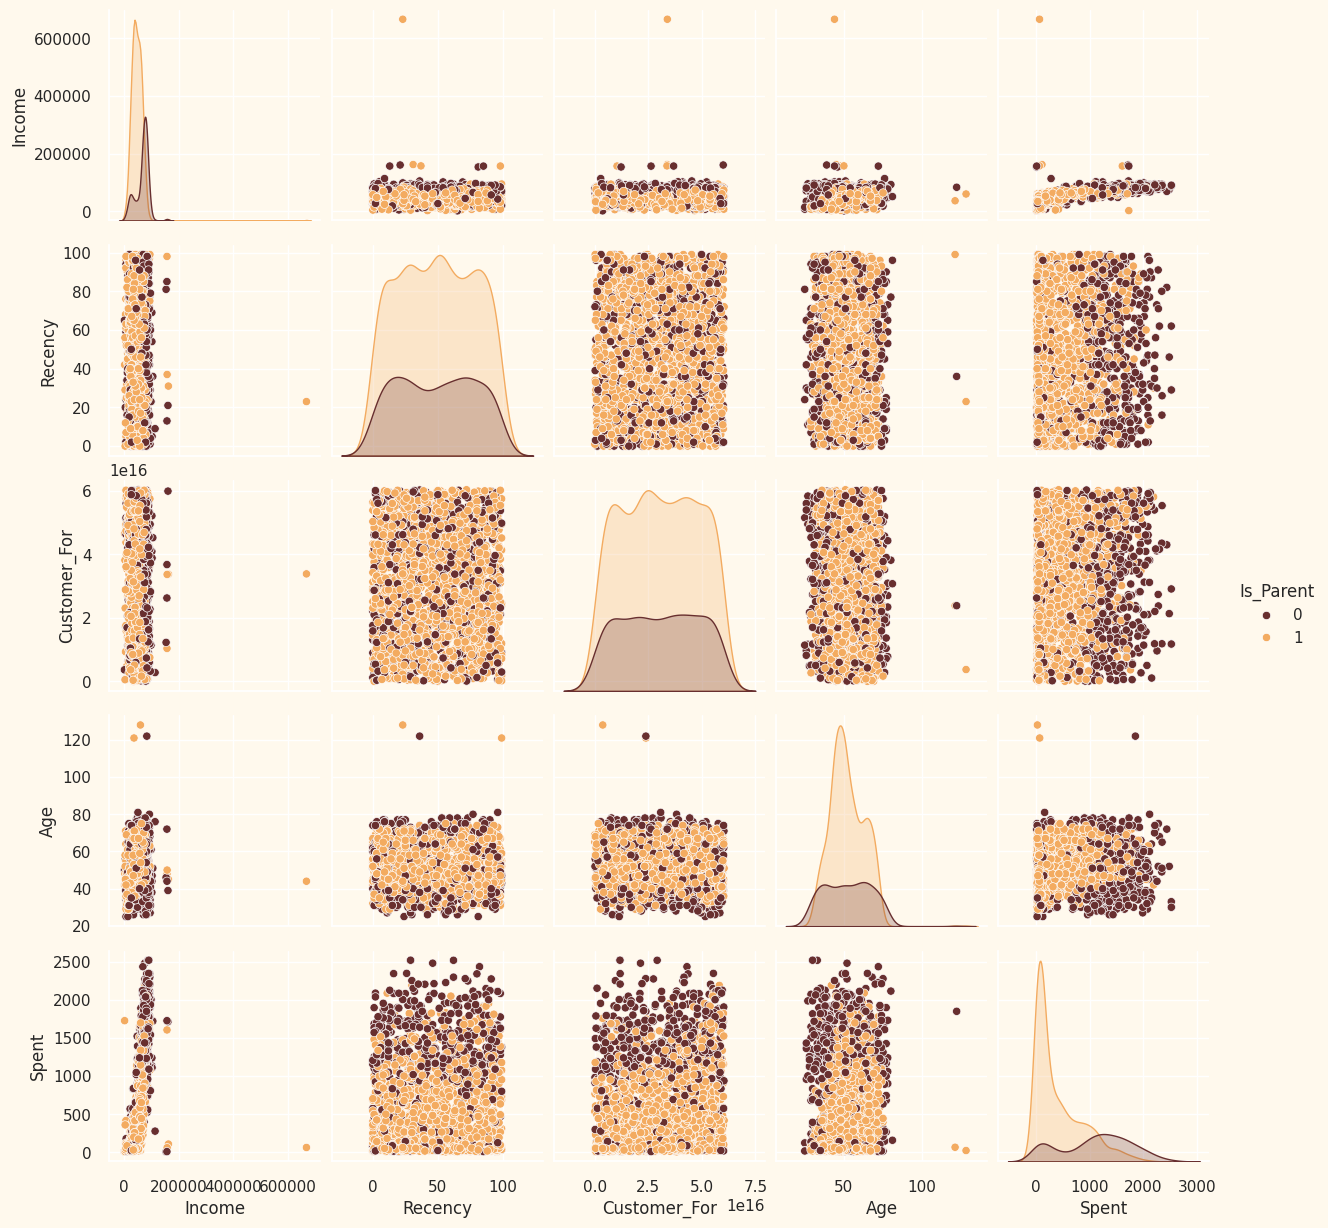

In [31]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
plt.show()

pair plot(산점도 행렬)은 여러 수치형 변수들 간의 관계를 한눈에 파악하기 위해 사용하는 시각화 도구, age에서 두드러지게 이상치를 확인할 수 있다

In [32]:
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


<Axes: >

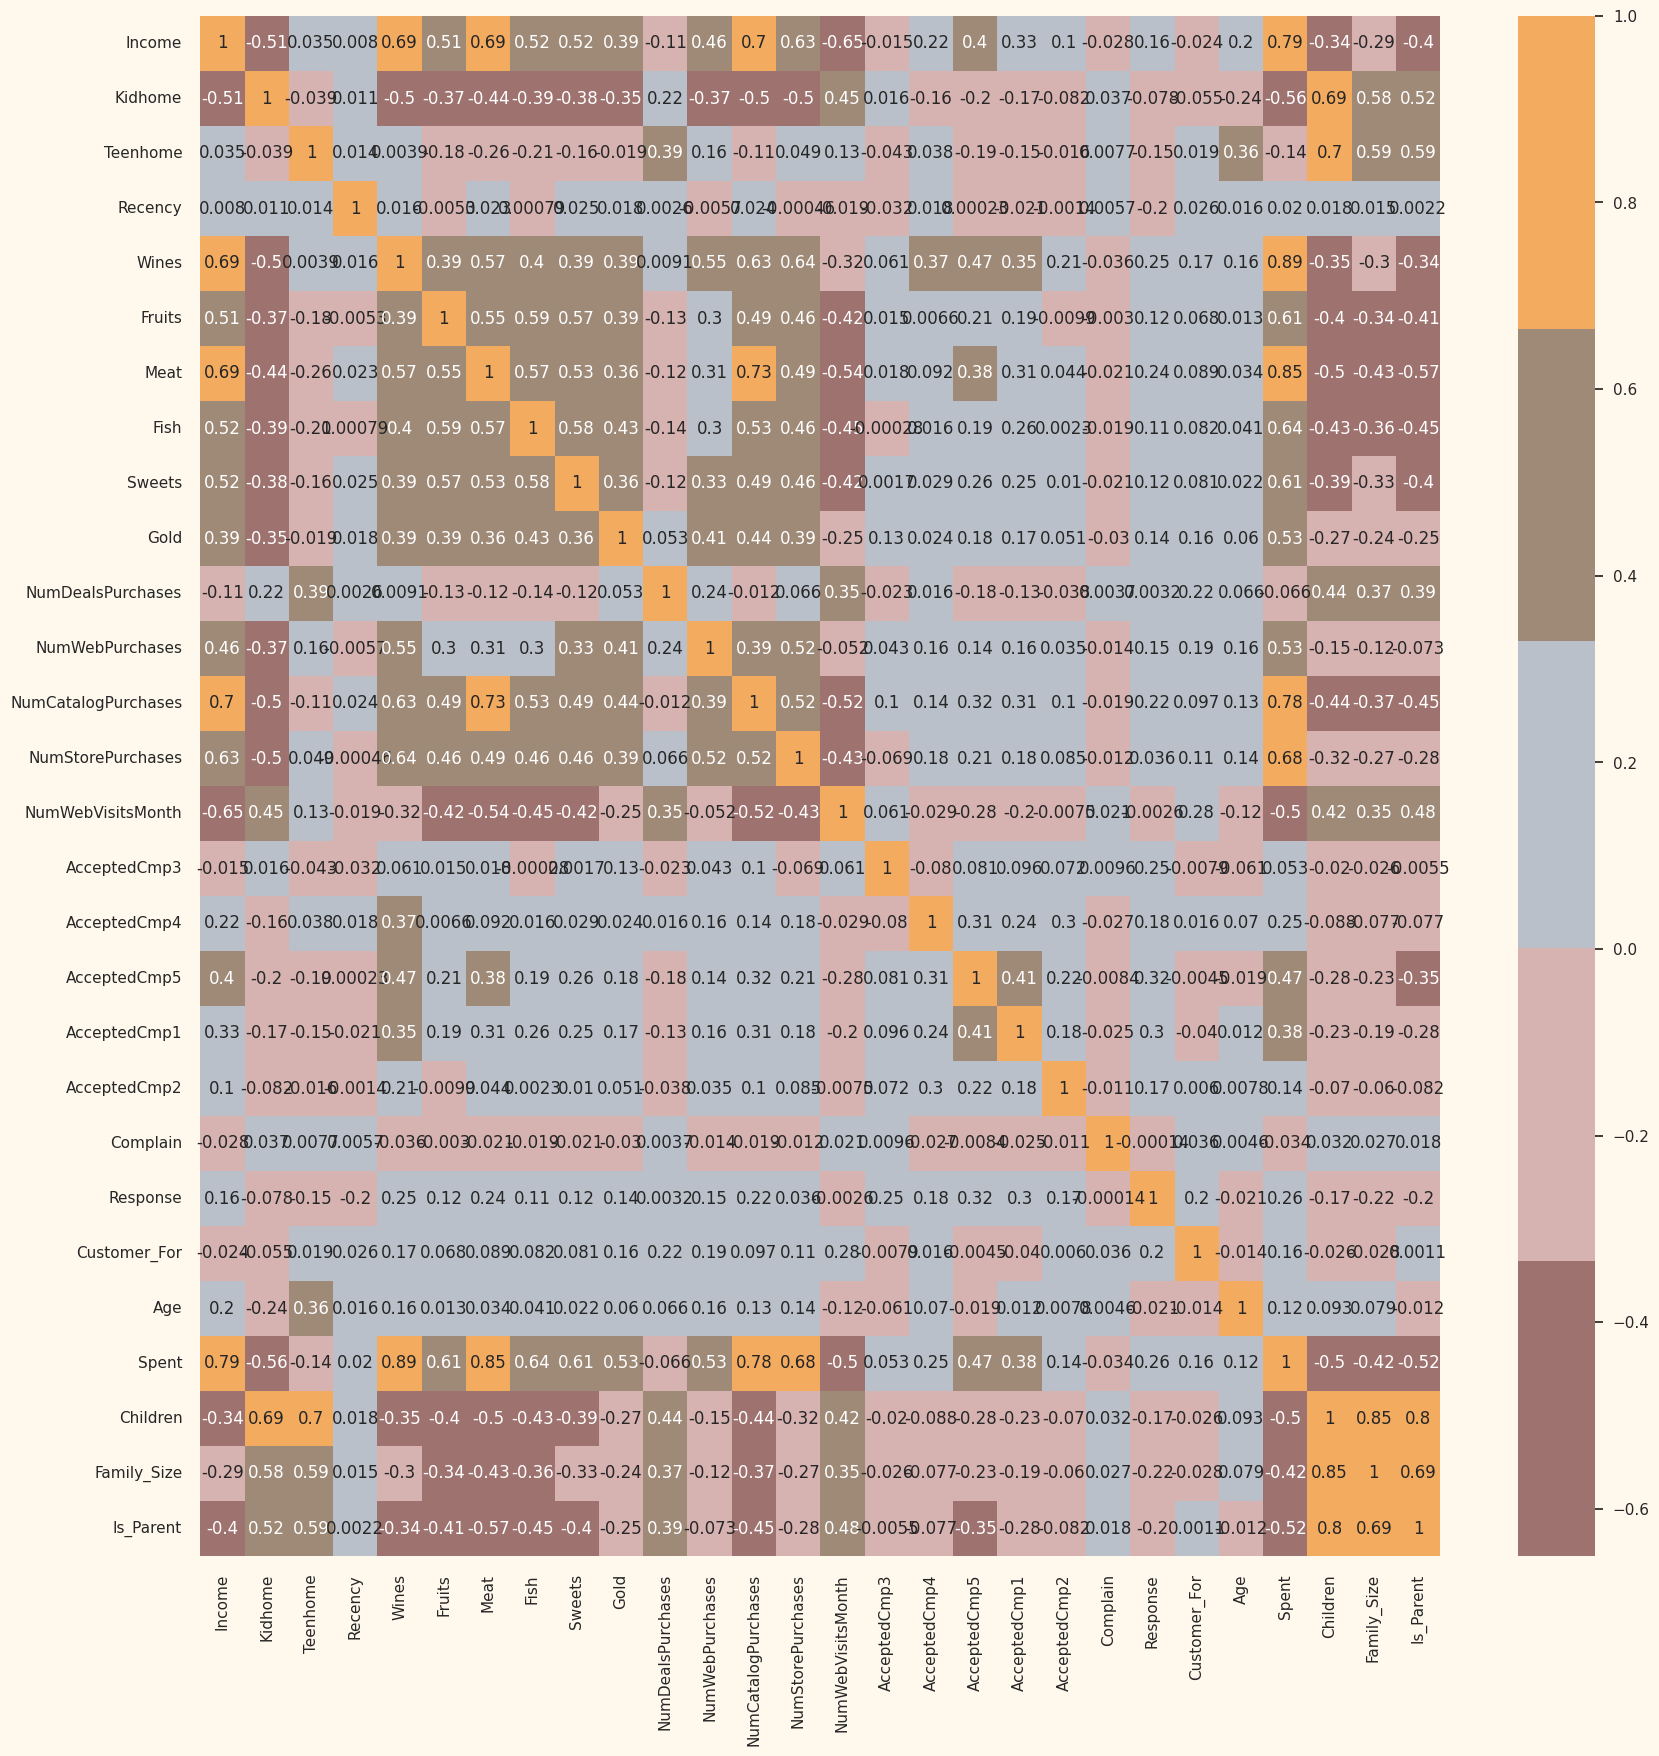

In [34]:
corrmat= data.corr(numeric_only=True)
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [35]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [36]:
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


object형인 데이터를 라벨인코더로 인코딩함

In [37]:
ds = data.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


바이너리 변수를 제외한 나머지 수치형 데이터를 셀렉(standard scaler하기위해)

In [38]:
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets      Gold  NumDealsPurchases  NumWebPurchases  \
0  1.690293  2.453472  1.483713  0.852576           0.351030         1.426865   
1 -0.718230 -0.651004 -0.634019 -0.733642          -0.168701        -1.126420   
2 -0.178542  1.339513 -0.147184 -0.037254          -0.688432         1.426865   
3 -0.655787 -0.504911 -0.585335 -0.752987          -0.168701        -0.761665   
4 -0.218684  0.152508 -0.001133 -0.559545           1.390492         0.332600   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Customer_For  \
0             2.503607          -0.555814           0.692181      1.527721   
1            -0.571340          -1.171160          -0.132545     -1.189011   
2            -0.229679           1.290224          -0.544908     -0.206048   
3            -0.913000          -0.555814           0.279818     -1.060584   
4             0.111982           0.059532          -0.132545     -0.951915   

        Age     Spent  Living_With  Children  Family_Size  Is_Parent  
0  1.018352  1.676245    -1.349603 -1.264598    -1.758359  -1.581139  
1  1.274785 -0.963297    -1.349603  1.404572     0.449070   0.632456  
2  0.334530  0.280110     0.740959 -1.264598    -0.654644  -1.581139  
3 -1.289547 -0.920135     0.740959  0.069987     0.449070   0.632456  
4 -1.033114 -0.307562     0.740959  0.069987     0.449070   0.632456

# 차원축소
-속성의 개수가 매우 많을 경우 군집화 정확도가 감소(PCA 차원 축소가 필요할 수 있다)

In [41]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
print(pca.explained_variance_ratio_) #이 코드는 직접 추가함 직관적으로 안보여서
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

[0.36011321 0.12699844 0.06592895]


count          mean       std       min       25%       50%       75%  \
col1  2212.0  5.781993e-17  2.878602 -5.978124 -2.539470 -0.781595  2.386380   
col2  2212.0  6.424437e-17  1.709469 -4.194757 -1.323929 -0.173721  1.234851   
col3  2212.0  1.244735e-17  1.231687 -3.625248 -0.853713 -0.050842  0.863974   

           max  
col1  7.452915  
col2  6.168189  
col3  6.750458

이분은 pca.explained_variance_ratio_를 사용해 설명력을 보지않고 describe()를 통해 확인했다.

 이 경우 분산을 확인하면 되는데, col1은 2.87의 분산을 설명하며 원본 데이터에서 가장 많은 데이터를 축약하고있다

그렇다면 왜 describe() 사용하였을까 -> Sanity Check(제대로 pca 됐는가)과 특징 확인을 위해

mean -> pca 특성상 0 이어야한다.

std-> 분산의 크기순서대로 설명력 확인

사분위수 -> 데이터 변환 후 이상치 있는지 확인, 데이터가 좁은 범위에 몰려있는지 확인

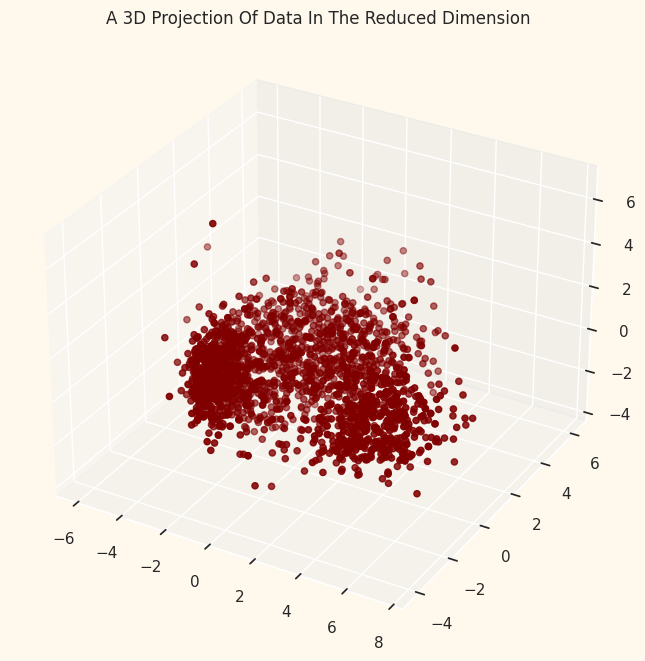

In [42]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

중앙 집중: 대부분의 데이터 포인트가 3차원 공간의 중앙(원점)에 밀집되어 있다. 이는 PCA 변환을 통해 각 주성분의 평균이 0이 되도록 데이터가 잘 중앙 집중화 되었음을 나타냄.

그러나 뚜렷하게 독립된 군집이 보이지 않으므로 클러스터링 개수를 찾기 어려울수있다.

# 클러스터링

Elbow Method to determine the number of clusters to be formed:


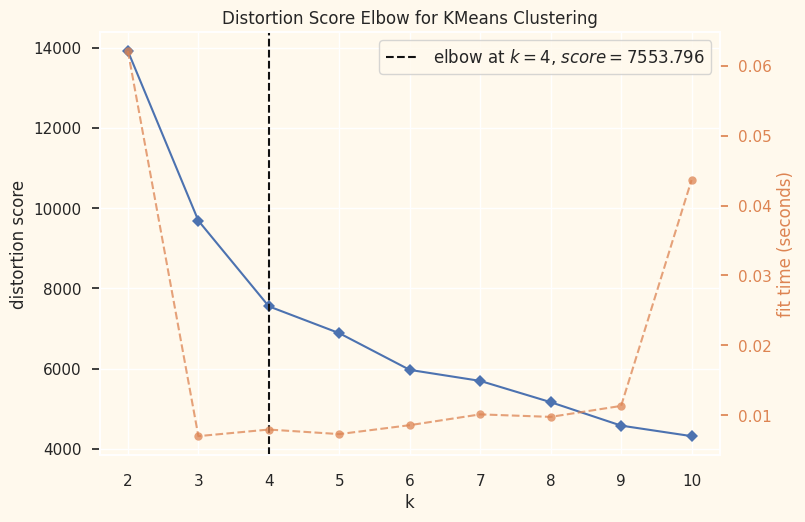

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

elbow 방식은 클러스터링 개수에 따른 sse(오차제곱합)의 흐름을 그래프로 그려 sse가 급감 이후 감소 폭이 좁아지는 구간을 최적의 클러스터링 개수로 판별하는 방식이다 (실제 데이터에선 이러한 구간이 명확하지 않을 가능성이 높으므로 참고)

그래프에선 4가 최적의 클러스터링 개수로 판별하고있다(팔처럼 꺾이는 부분)

In [44]:
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
data["Clusters"]= yhat_AC

여기에서 병합 계층적 군집분석을 사용하였다.
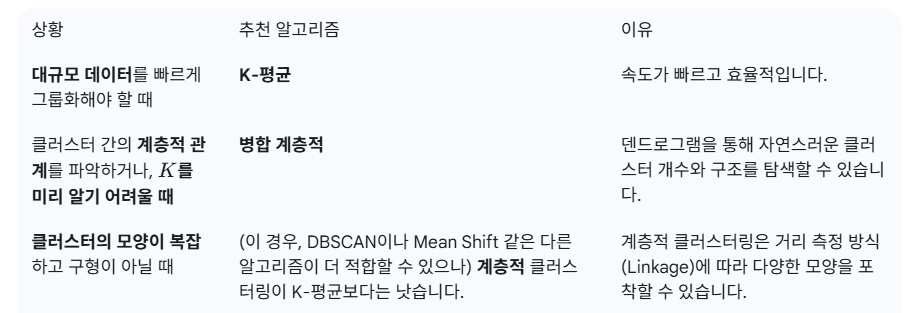

병합 계층적 클러스터링은 클러스터 개수를 먼저 정하지 않고 모든 데이터 포인트를 개별 클러스터로 시작하여, 유사도가 가장 높은 클러스터들을 점차적으로 병합하는 방식으로 진행된다. 단점으로는 한번 그룹으로 지정되면 클러스터를 분리할 수 없어 초기단계의 병합이 큰 영향을 끼친다는 점이다.

분활 계층적 클러스터링은 그와 반대로 이질적인 클러스터를 분활해가는 방식이다. 모든 가능한 분할을 고려해야 하므로 계산 시간이 가장 길고, 거의 사용되지 않는다.

# 클러스터링 분류
- 분할형, 계층형, 밀도 기반


1. 분활형 핵심:

미리 정한 K개의 중심을 기준으로 데이터를 나눕니다.

특징: 클러스터 개수(K)를 반드시 사전에 지정해야 합니다.

Ex) kmeans 알고리즘 (중심기반)

2. 계층형 클러스터링

핵심: 클러스터 간의 계층 구조를 생성합니다.

특징: 클러스터 개수(K)를 나중에 덴드로그램()을 보고 결정할 수 있어 유연합니다.

Ex) 병합 계층적 클러스터링 , 분할 계층적 클러스터링

3. 밀도 기반 클러스터링

핵심: 데이터의 밀도를 기준으로 클러스터를 정의합니다.

특징: 비선형적인 모양의 클러스터를 찾는 데 유리하며, 밀도가 낮은 영역의 데이터는 이상치로 간주하여 자동 제외합니다.  K를 미리 지정할 필요가 없습니다.


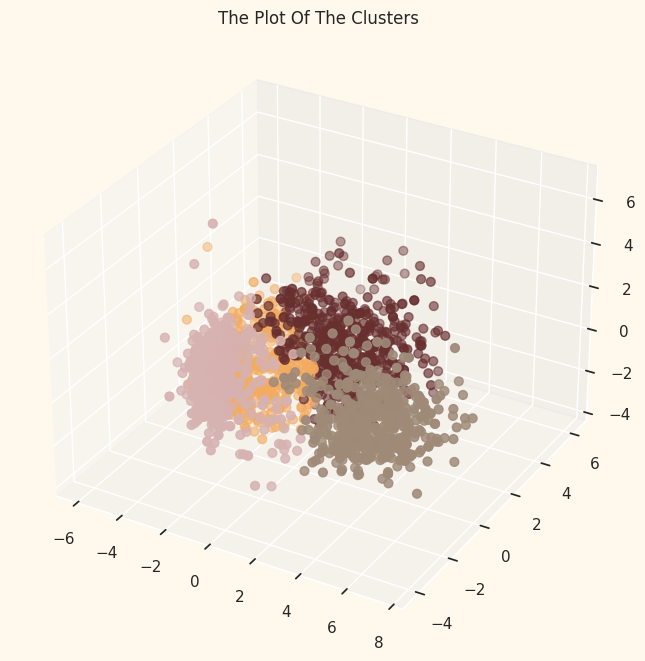

In [45]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

# 모델평가


정답 레이블이 없으므로 이 단계의 핵심 목표는 모델의 성능을 평가하는 것이 아니라, 형성된 클러스터들의 특성 및 패턴을 이해하는 것

/tmp/ipython-input-1999309165.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=data["Clusters"], palette= pal)


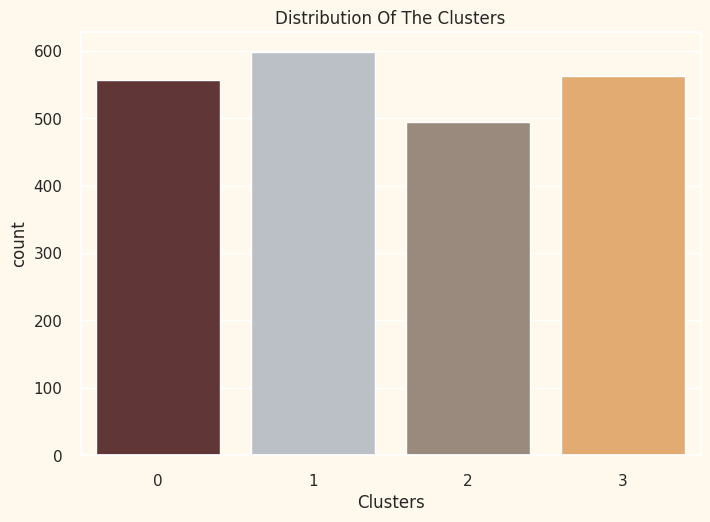

In [46]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

4개 클러스터에 고객들이 비교적 균등하게 분포

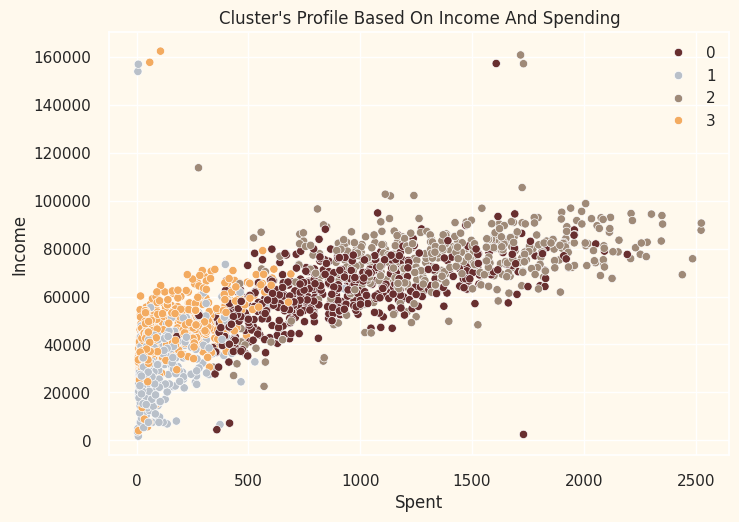

In [47]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

클러스터 1: 주로 소득이 낮으므로지출액도 낮은 영역에 집중되어 있다. 저소득/저지출 그룹.

클러스터 0, 2 : 주로 소득이 높고 지출액도 높은 영역에 겹쳐 분포.고소득/고지출 그룹.

클러스터 3: 소득과 지출이 클러스터 1보다는 높고 클러스터 0, 2보다는 낮은 중간 소득/중간 지출 영역에 주로 분포.

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 71.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 56.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipython-input-547382256.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
/usr/local/lib/python3.12/dist-packages/seaborn/ca

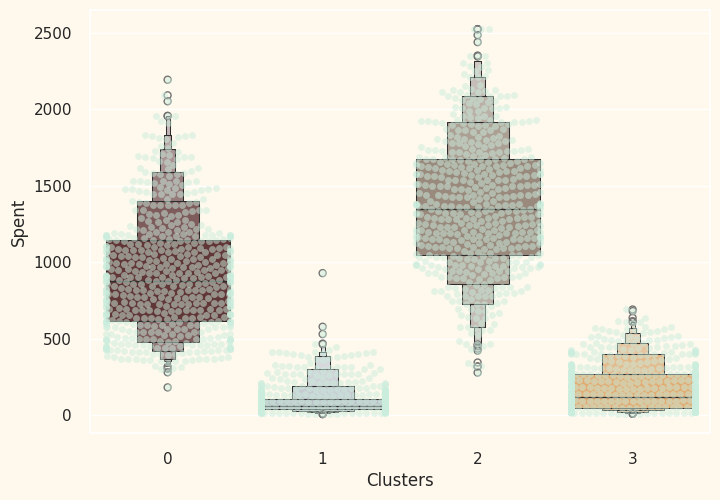

In [48]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()

위 그룹핑을 더 명확하게 보여줌

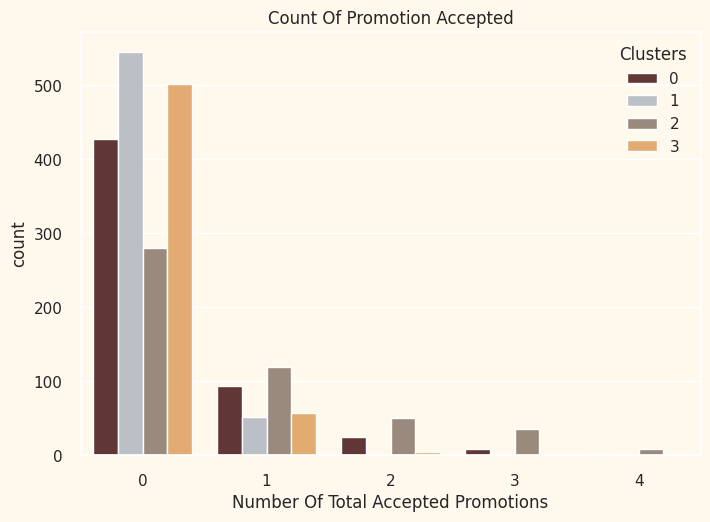

In [49]:
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

클러스터0:할인 거래에 가장 적극적인 고객 그룹

/tmp/ipython-input-3578979280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)


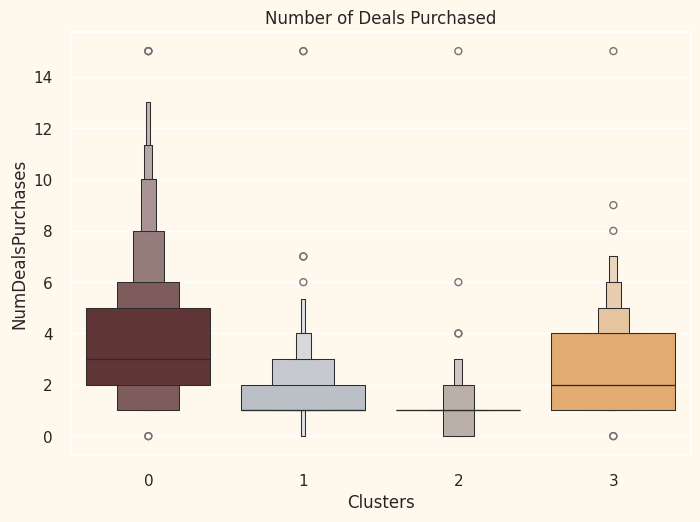

In [50]:
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

위와같음

# 프로파일링

<Figure size 800x550 with 0 Axes>

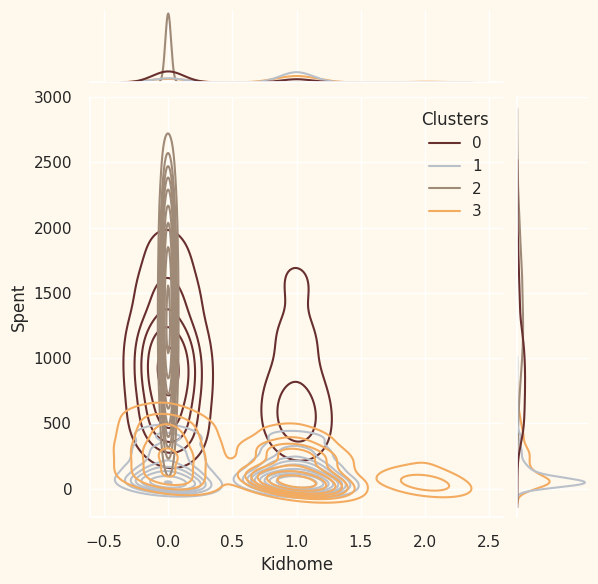

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

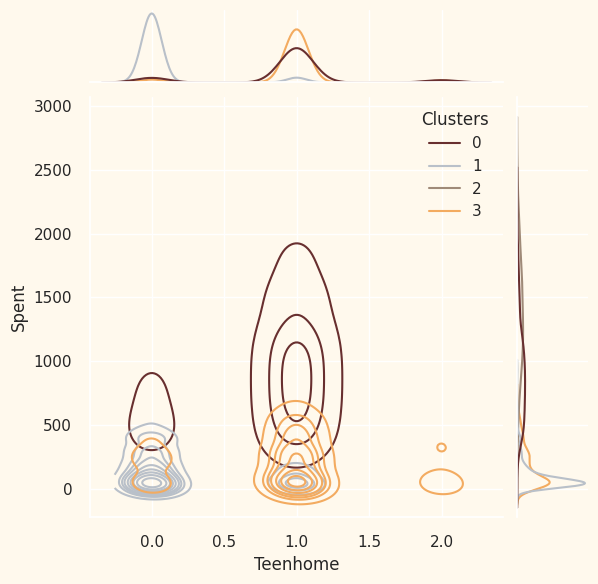

<Figure size 800x550 with 0 Axes>

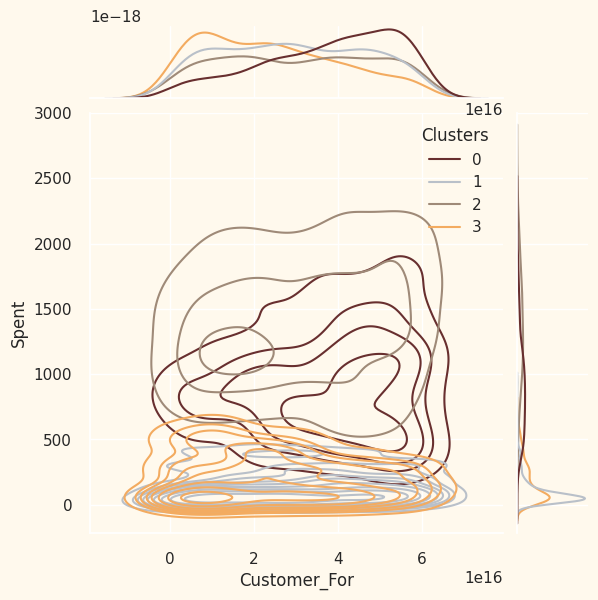

<Figure size 800x550 with 0 Axes>

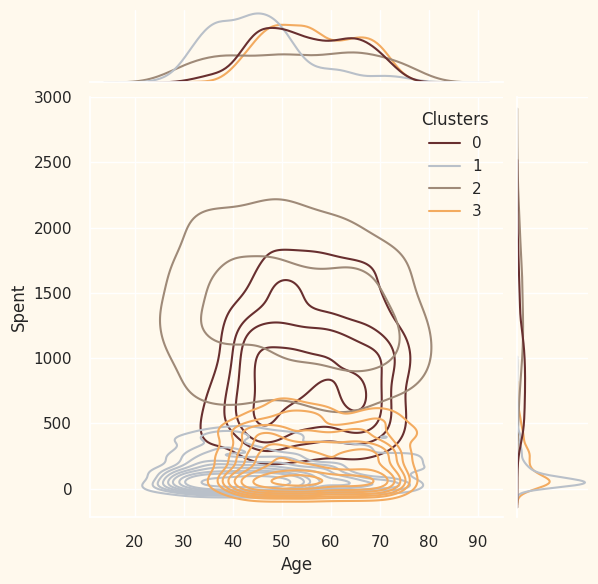

<Figure size 800x550 with 0 Axes>

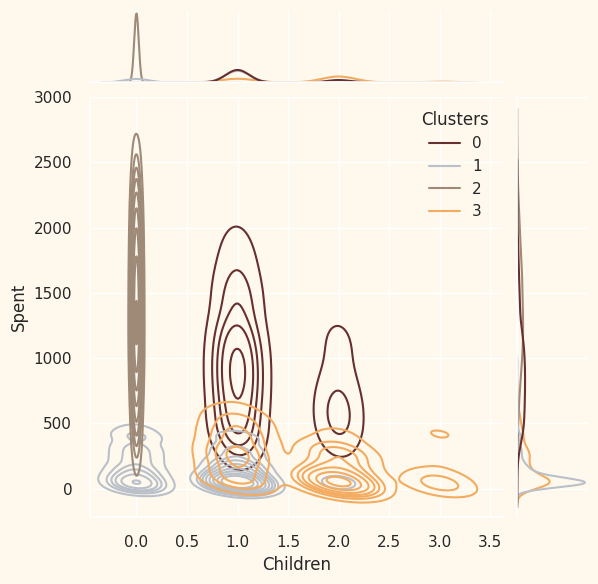

<Figure size 800x550 with 0 Axes>

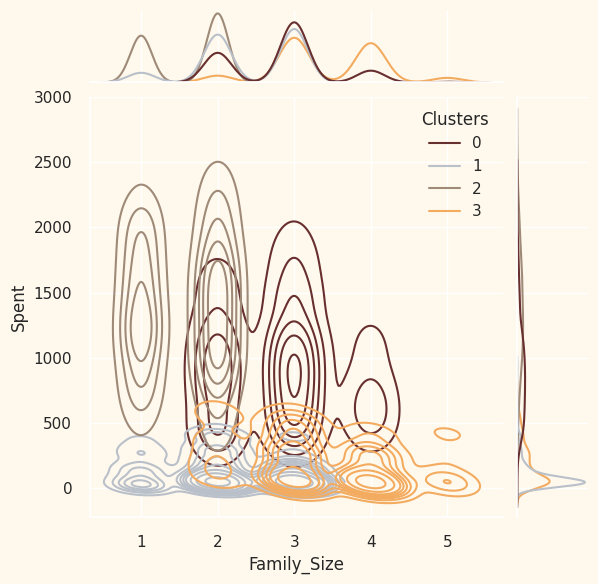

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

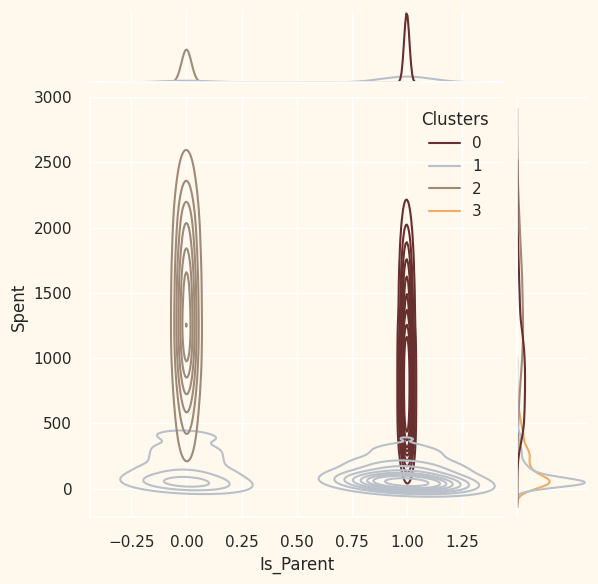

<Figure size 800x550 with 0 Axes>

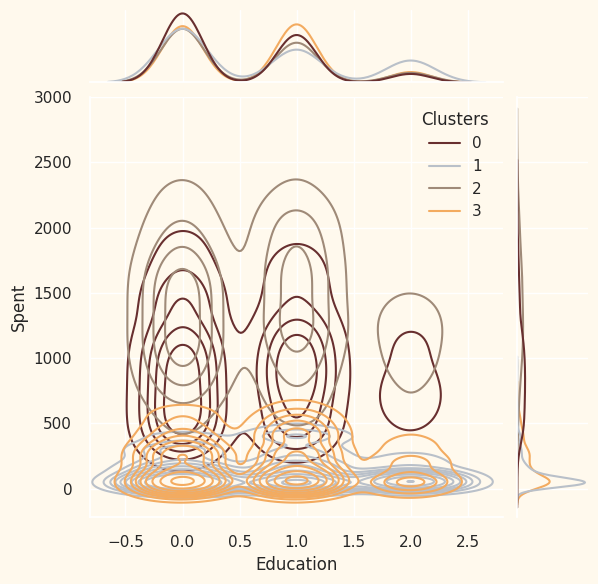

<Figure size 800x550 with 0 Axes>

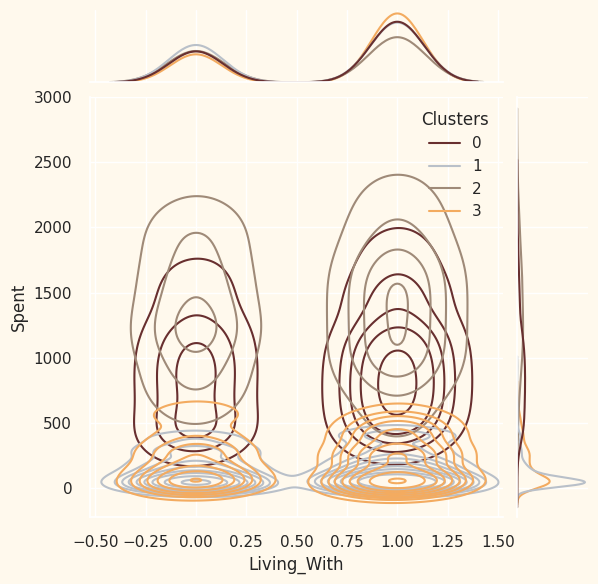

In [51]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()

#클러스터 특징 정리

- 클러스터 0
부모 여부: 명확하게 부모

가구 규모: 가족 구성원이 최대 4명이며, 최소 2명

결혼 상태: 싱글 부모는 이 그룹의 하위 집합

자녀: 대부분 집에 청소년을 두고 있다

나이: 상대적으로 나이가 많은 편입니다

- 클러스터 1
부모 여부: 명확하게 부모가 아님

가구 규모: 가족 구성원이 최대 2명

결혼 상태: 대다수가 싱글이거나 커플입니다 (혼자살거나 동거인이 있다)
나이: 모든 연령대에 걸쳐 분포

소득: 고소득 그룹입니다

- 클러스터 2
부모 여부: 대다수가 부모

가구 규모: 가족 구성원이 최대 3명

자녀: 주로 어린이 1명을 두고 있으며, 일반적으로 청소년은 없다

나이: 상대적으로 젊은 편

- 클러스터 3
부모 여부: 명확하게 부모

가구 규모: 가족 구성원이 최대 5명이며, 최소 2명

자녀: 대다수가 집에 청소년을 두고 있다.

나이: 상대적으로 나이가 많은 편

소득: 저소득 그룹

# 회고

- 계층적 병합 클러스터링을 처음 사용해본거라 클러스터링에 대해 자세하게 찾아보는 기회가 되었다. 클러스터링을 세분화하여 큰 틀을 잡을 수 있었다.

- 그리고 joint plot을 처음 사용해보았는데 ,다양하게 시각화하여 각 클러스터의 특징을 찾아보는 과정이 중요한 것을 다시금 상기했다.

- 비지도학습이므로 명확한평가지표가 존재하지 않다는 점이 아직은 어려워 클러스터링을 여러번 진행하면서 감을 잡아야 할 것 같다.

- 또한 비지도학습은 mainquest를 진행하지 않아 따로 더 학습이 필요하다고 생각했는데 이번 기회로 어느정도 틀을 잡은것같아 좋은 기회가 되었다.

- 이번에는 최적의 클러스터를 엘보우 기법으로 찾았는데 실루엣 점수로 교차검증하면 어떠한 결과가 나오는지 궁금해졌다. 또한 kmeans 로 클러스터링 하였을때 결과가 어떻게 나올지 궁금하다